# Calculate receiver functions from minimal example
This notebook demonstrates the most simple use case of the [rf](https://github.com/trichter/rf) package.

If you want to run this notebook locally, have a look at the repository [readme](https://github.com/trichter/notebooks). Dependencies of this notebook are ObsPy and rf.

We load example data into a RFStream instance by simply calling `read_rf()`. The stream consists of 9 traces with three component data from three different earthquakes. The header values of the first trace in the stream is printed and we can observe that the SAC headers in `stats.sac` are correctly mapped to corresponding entries in `stats`. Raw waveforms of the first event are plotted with ObsPy.

9 Trace(s) in Stream:
CX.PB01..BHE | 2011-02-25T13:15:18.169539Z - 2011-02-25T13:17:18.169539Z | 5.0 Hz, 601 samples
CX.PB01..BHN | 2011-02-25T13:15:18.169539Z - 2011-02-25T13:17:18.169539Z | 5.0 Hz, 601 samples
CX.PB01..BHZ | 2011-02-25T13:15:18.169539Z - 2011-02-25T13:17:18.169539Z | 5.0 Hz, 601 samples
CX.PB01..BHE | 2011-03-06T14:40:39.719539Z - 2011-03-06T14:42:39.719539Z | 5.0 Hz, 601 samples
CX.PB01..BHN | 2011-03-06T14:40:39.719538Z - 2011-03-06T14:42:39.719538Z | 5.0 Hz, 601 samples
CX.PB01..BHZ | 2011-03-06T14:40:39.719539Z - 2011-03-06T14:42:39.719539Z | 5.0 Hz, 601 samples
CX.PB01..BHE | 2011-05-13T22:54:13.319538Z - 2011-05-13T22:56:13.319538Z | 5.0 Hz, 601 samples
CX.PB01..BHN | 2011-05-13T22:54:13.319536Z - 2011-05-13T22:56:13.319536Z | 5.0 Hz, 601 samples
CX.PB01..BHZ | 2011-05-13T22:54:13.319538Z - 2011-05-13T22:56:13.319538Z | 5.0 Hz, 601 samples

Stats:
           network: CX
          station: PB01
         location: 
          channel: BHE
        starttime: 2011-0

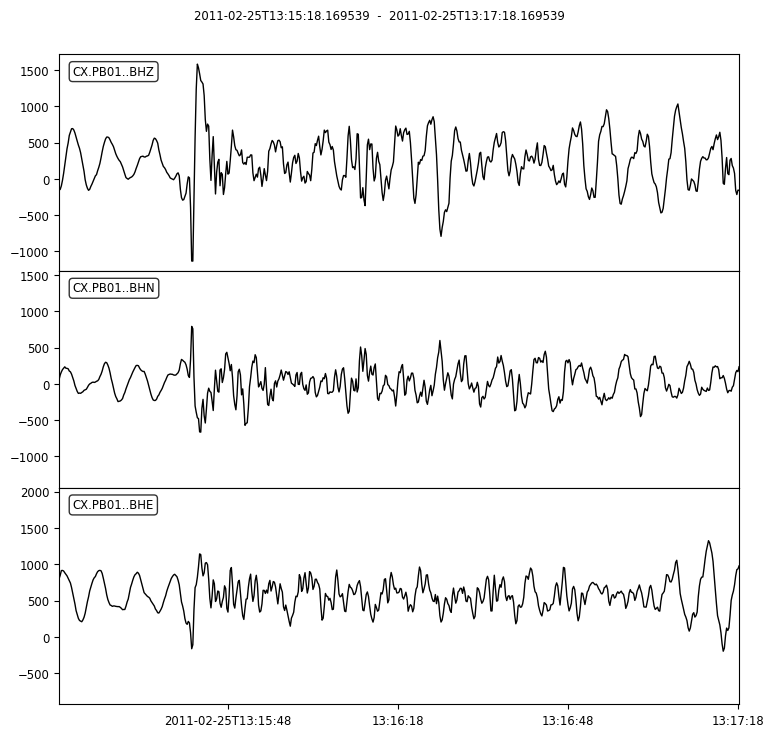

In [1]:
import matplotlib.pyplot as plt
from rf import read_rf, rfstats

stream = read_rf()
print(stream)
print('\nStats:\n', stream[0].stats)
stream[:3].plot()

Now, we fill the stats dictionary with entries which we need for receiver function calculation with the `rfstats` function. The print statement automatically displays some important header values. Data is filtered, trimmed and the preprocessed data of the first event is again plotted with ObsPy.

9 Trace(s) in Stream:
CX.PB01..BHE | -15.0s - 75.0s onset:2011-02-25T13:15:38.137852Z | 5.0 Hz, 451 samples | mag:6.0 dist:46.1 baz:325.0 slow:7.83
CX.PB01..BHN | -15.0s - 75.0s onset:2011-02-25T13:15:38.137852Z | 5.0 Hz, 451 samples | mag:6.0 dist:46.1 baz:325.0 slow:7.83
CX.PB01..BHZ | -15.0s - 75.0s onset:2011-02-25T13:15:38.137852Z | 5.0 Hz, 451 samples | mag:6.0 dist:46.1 baz:325.0 slow:7.83
CX.PB01..BHE | -15.1s - 74.9s onset:2011-03-06T14:40:59.799529Z | 5.0 Hz, 451 samples | mag:6.5 dist:47.1 baz:149.2 slow:7.77
CX.PB01..BHN | -15.1s - 74.9s onset:2011-03-06T14:40:59.799529Z | 5.0 Hz, 451 samples | mag:6.5 dist:47.1 baz:149.2 slow:7.77
CX.PB01..BHZ | -15.1s - 74.9s onset:2011-03-06T14:40:59.799529Z | 5.0 Hz, 451 samples | mag:6.5 dist:47.1 baz:149.2 slow:7.77
CX.PB01..BHE | -15.0s - 75.0s onset:2011-05-13T22:54:33.294357Z | 5.0 Hz, 451 samples | mag:6.0 dist:34.2 baz:333.6 slow:8.63
CX.PB01..BHN | -15.0s - 75.0s onset:2011-05-13T22:54:33.294357Z | 5.0 Hz, 451 samples | mag:6.0 

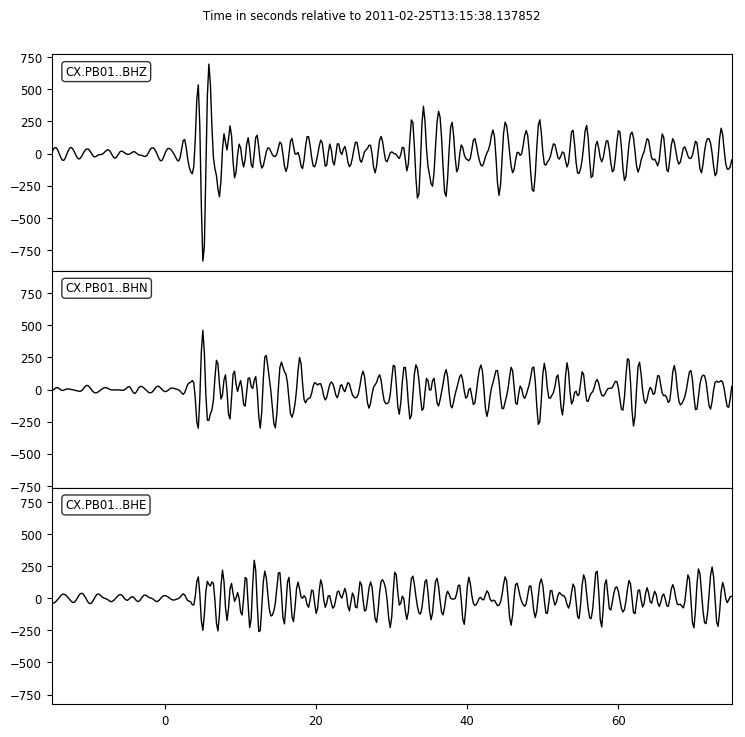

In [2]:
rfstats(stream)
stream.filter('bandpass', freqmin=0.4, freqmax=1)
stream.trim2(5, 95, 'starttime')
print(stream)
stream[:3].plot(type='relative', reftime=stream[0].stats.onset)

Finally, we perform the receiver function calculation, i.e. rotation and deconvolution, by calling `RFStream.rf()`. The L components of the receiver functions have the expected peak at 0s. The Q component stack shows a distinct phase at around 9s. That's it.

9 Trace(s) in Stream:
Prf CX.PB01..BHT | -5.0s - 22.0s onset:2011-02-25T13:15:38.169539Z | 5.0 Hz, 136 samples | mag:6.0 dist:46.1 baz:325.0 slow:6.40 (Ps moveout)
Prf CX.PB01..BHQ | -5.0s - 22.0s onset:2011-02-25T13:15:38.169539Z | 5.0 Hz, 136 samples | mag:6.0 dist:46.1 baz:325.0 slow:6.40 (Ps moveout)
Prf CX.PB01..BHL | -5.0s - 22.0s onset:2011-02-25T13:15:38.169539Z | 5.0 Hz, 136 samples | mag:6.0 dist:46.1 baz:325.0 slow:6.40 (Ps moveout)
Prf CX.PB01..BHT | -5.0s - 22.0s onset:2011-03-06T14:40:59.719539Z | 5.0 Hz, 136 samples | mag:6.5 dist:47.1 baz:149.2 slow:6.40 (Ps moveout)
Prf CX.PB01..BHQ | -5.0s - 22.0s onset:2011-03-06T14:40:59.719539Z | 5.0 Hz, 136 samples | mag:6.5 dist:47.1 baz:149.2 slow:6.40 (Ps moveout)
Prf CX.PB01..BHL | -5.0s - 22.0s onset:2011-03-06T14:40:59.719539Z | 5.0 Hz, 136 samples | mag:6.5 dist:47.1 baz:149.2 slow:6.40 (Ps moveout)
Prf CX.PB01..BHT | -5.0s - 22.0s onset:2011-05-13T22:54:33.319538Z | 5.0 Hz, 136 samples | mag:6.0 dist:34.2 baz:333.6 slow:6.

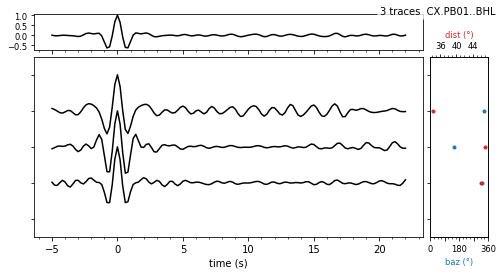

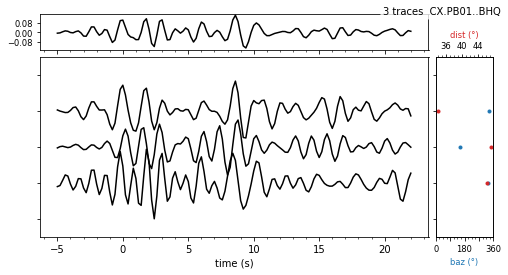

In [3]:
stream.rf()
stream.moveout()
stream.trim2(-5, 22, 'onset')
print(stream)
stream.select(component='L').plot_rf()    
stream.select(component='Q').plot_rf()
plt.show()